<a href="https://colab.research.google.com/github/logz254/Compiler-Construction-2022/blob/main/Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compiler Construction Group Work**

---



Group Members: 122466, 120374, 121425, 122182

# **Lab 1: Definition of Flex, Lex, Bison and Yacc**

**A) FLEX**

Flex (fast lexical analyzer generator) is a tool for building compilers, it generates lexical analyzers.


*   A flex program has a list of regular expressions with actions which are instructions about what to do when the input matches any of them.
*   A flex-generated scanner reads through its input, matching the input against all of the regular expressions and doing the appropriate action on each match.


*   Flex translates all regular expressions into an efficient internal form that lets it match the input against all the patterns simultaneously.










![picture](https://media.geeksforgeeks.org/wp-content/uploads/how_flex_is_used.jpeg)

Simple Word Count Flex Program. It is meant to read through a file and return the number of lines, words, and characters.

In [ ]:
/***Variable are accessed inside yylex() and main()***/
%{
int chars = 0;
int words = 0;
int lines = 0;
%}

/***Rules Section***/

%%
[a-zA-Z]+ { words++; chars += strlen(yytext); }
\n { chars++; lines++; }
. { chars++; }
%%

/***Code Section that prints the number of lines,word and characters***/
int main()
{
 yylex();
 printf("%8d%8d%8d\n", lines, words, chars);
}


**B) LEX**

*   Lex is a program that generates lexical analyzer. It is used with YACC parser generator.
*   The lexical analyzer is a program that transforms an input stream into a sequence of tokens.
*   It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.


 **The function of Lex is as follows:**
1.   Lexical analyzer creates a program lex.1 in the Lex language.
2.   Then Lex compiler runs the lex.1 program and produces a C program lex.yy.c.
3.   C compiler runs the lex.yy.c program and produces an object program a.out. (a.out is a lexical analyzer that transforms an input stream into a sequence of tokens).
This is illustrated in the diagram below

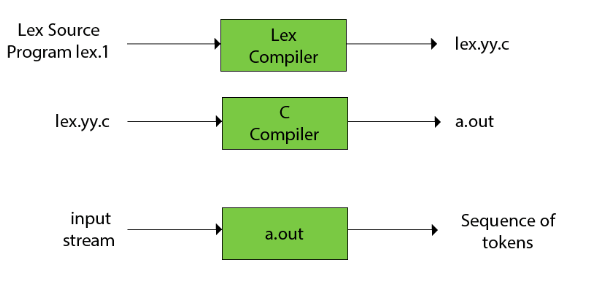

**Lex Syntax**

{ definitions }

%%

{ rules }

%%

{ user subroutines }

Where:


*   Definitions include declarations of constant, variable and regular definitions.
*   Rules define the statement of form p1 {action1} p2 {action2}....pn {action}. Where p1 describes the regular expression and action1 describes the actions the lexical analyzer should take when pattern p1 matches a lexeme.
*   User subroutines are auxiliary procedures needed by the actions. The subroutine can be loaded with the lexical analyzer and compiled separately.




The sections are separated using delimiters

Lex code snippet (count the number of words)



In [ ]:
%{
	#include<stdio.h>
	#include<string.h>
	int a = 0, b=0, c=0, d=0, l=0;
%}
	

%%
[a-z] {a++;l++;}
[A-Z] {b++;l++;}
[0-9] {c++;l++;}
[$&+, :;=?@#|'<>.-^*()%!] {d++;l++;}
. ;
%%
	
int yywrap(void){}
	
int main()
{	
	// The function that starts the analysis
	yylex();
	if(a>0 && b>0 && c>0 && d>0 && l>=8)
	printf("VALID\n");
	else
		printf("INVALID\n");
	return 0;
}

**C) BISON**



*  Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR (Left-to-right,Rightmost derivation) or generalized LR(GLR (Generalized LR)) parser employing LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser tables.
*   Bison is upward compatible with Yacc: all properly-written Yacc grammars ought to work with Bison with no change.







In [ ]:
%{
Prologue
%}

Bison declarations

%%
Grammar rules
%%
Epilogue

*   The '%%', '%{' and '%}' are punctuation that appears in every Bison grammar file to separate the sections.
*   The prologue may define types and variables used in the actions.
*   The Bison declarations declare the names of the terminal and nonterminal symbols, and may also describe operator precedence and the data types of semantic values of various symbols.
*   The grammar rules define how to construct each nonterminal symbol from its parts.
*  The epilogue is where definitions of functions declared in the prologue go here. 









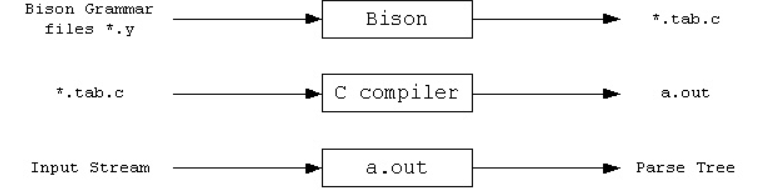



1.   List item

*   Code snippet of grammar specification for bison
*   List item


2.   List item



In [ ]:
/* Mini Calculator */
/* calc.y */

%{
#include "heading.h"
int yyerror(char *s);
int yylex(void);
%}

%union{
  int		int_val;
  string*	op_val;
}

%start	input 

%token	<int_val>	INTEGER_LITERAL
%type	<int_val>	exp
%left	PLUS
%left	MULT

%%

input:		/* empty */
		| exp	{ cout << "Result: " << $1 << endl; }
		;

exp:		INTEGER_LITERAL	{ $$ = $1; }
		| exp PLUS exp	{ $$ = $1 + $3; }
		| exp MULT exp	{ $$ = $1 * $3; }
		;

%%

int yyerror(string s)
{
  extern int yylineno;	// defined and maintained in lex.c
  extern char *yytext;	// defined and maintained in lex.c
  
  cerr << "ERROR: " << s << " at symbol \"" << yytext;
  cerr << "\" on line " << yylineno << endl;
  exit(1);
}

int yyerror(char *s)
{
  return yyerror(string(s));
}



**D) YACC**


*   YACC (Yet Another Compiler-Compiler) is an LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser generator. 
*   YACC was initially intended to be used in conjunction with Lex.
*   The rule or grammar is the input to YACC, and the output is a C program.
*   YACC input file is divided into three parts:
    1.   Definition -> includes information about the tokens used in the syntax definition.
    2.   Rules -> contains grammar definition in a modified Backus Normal Form (BNF)
    3.   Auxiliary Routines -> includes function definitions for every function needed in rules part.
*   The output file "file.output" contains the parsing tables. The file "file.tab.h" contains declarations. The parser called the yyparse( ). Parser expects to use a function called yylex() to get tokens. The syntax is as follows:

        def function_name_here(symbol):
          expression = expression token_name term

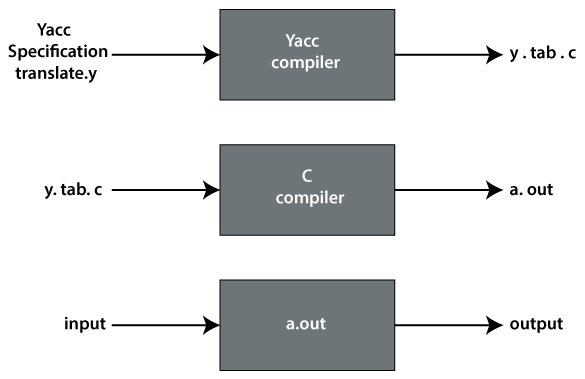

*Yacc Code Snippet*

In [ ]:
%{
#include <ctype.h>
#include <stdio.h>
#define YYSTYPE double /* double type for yacc stack */
%}

%%
Lines : Lines S '\n' { printf("OK \n"); }
	| S '\n’
	| error '\n' {yyerror("Error: reenter last line:");
						yyerrok; };
S	 : '(' S ')’
	| '[' S ']’
	| /* empty */ ;
%%

#include "lex.yy.c"

void yyerror(char * s)
/* yacc error handler */
{
fprintf (stderr, "%s\n", s);
}

int main(void)
{
return yyparse();
}


# **Lab 2.1: Conversion of NFA to DFA**

**First Example**

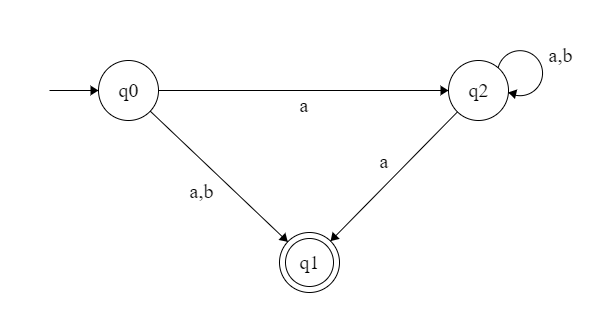

**Solution**



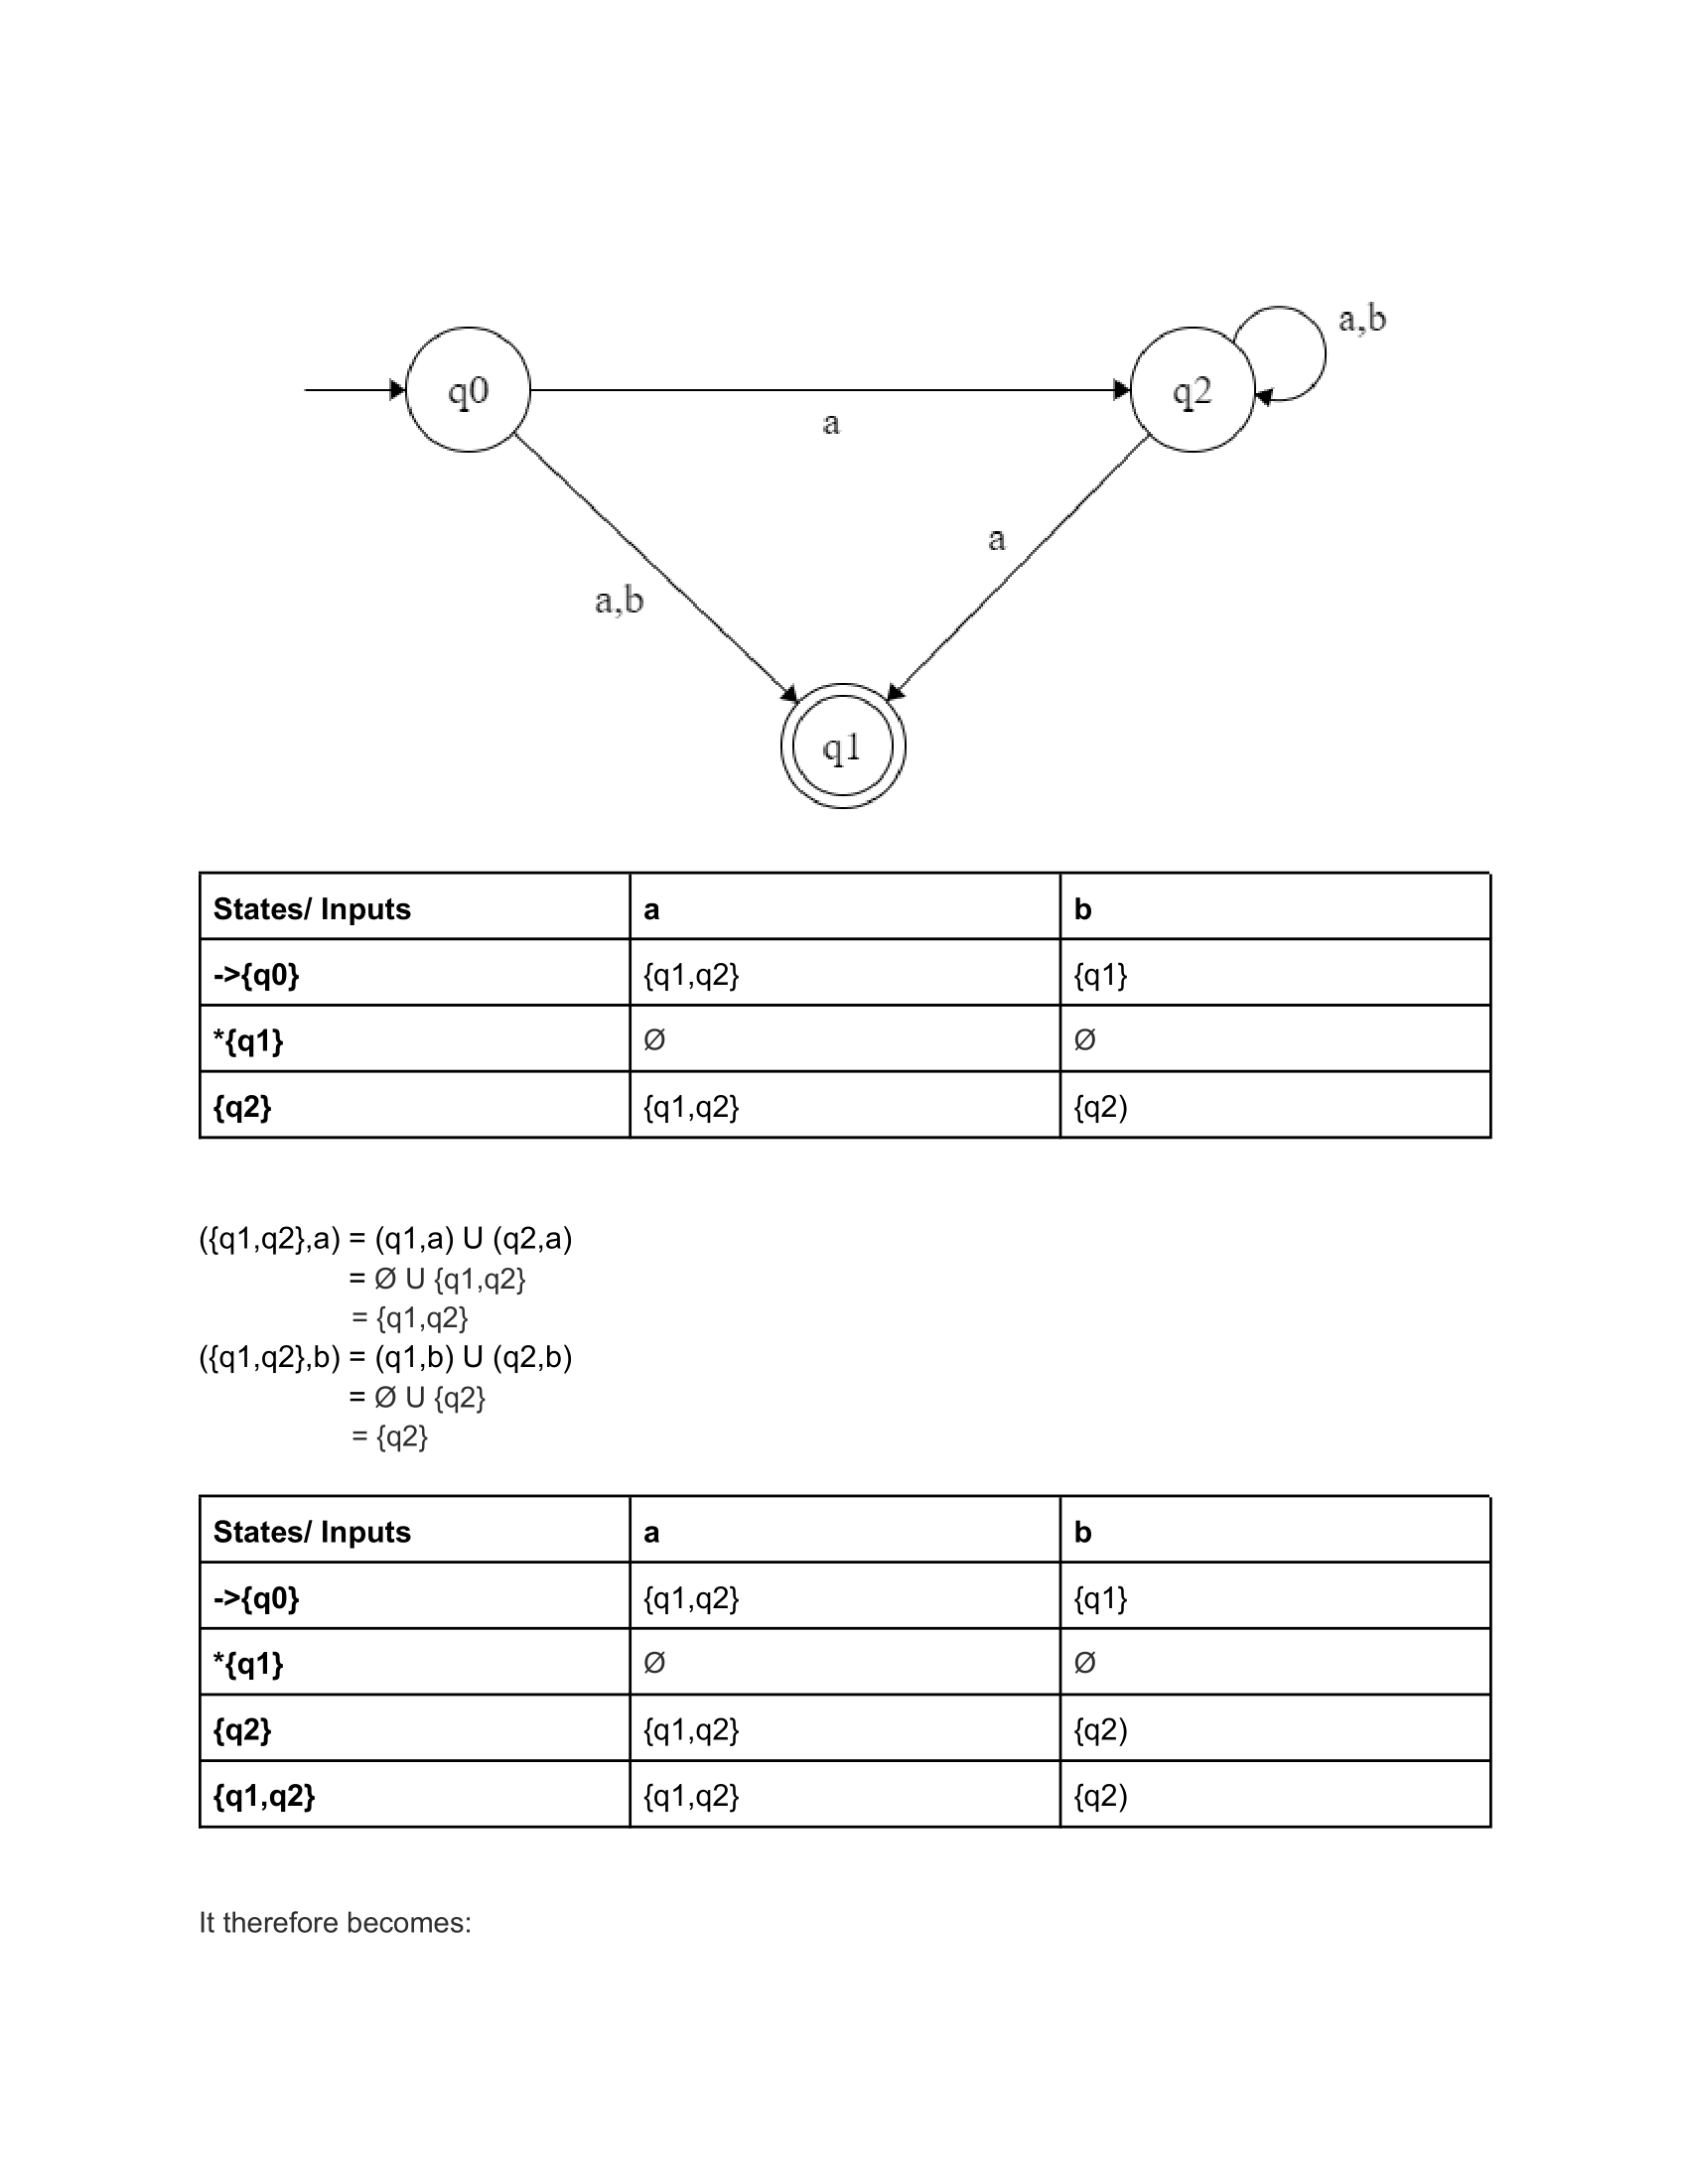

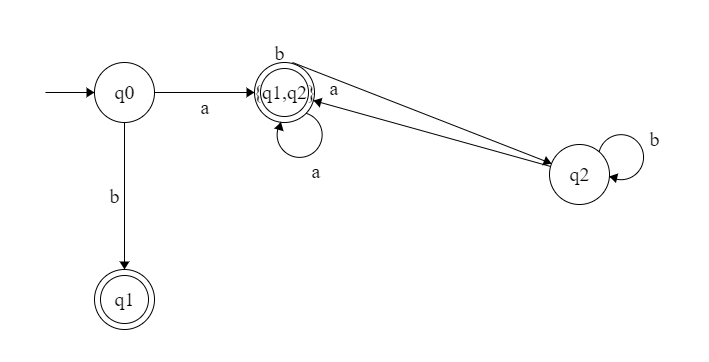

**Second Example**

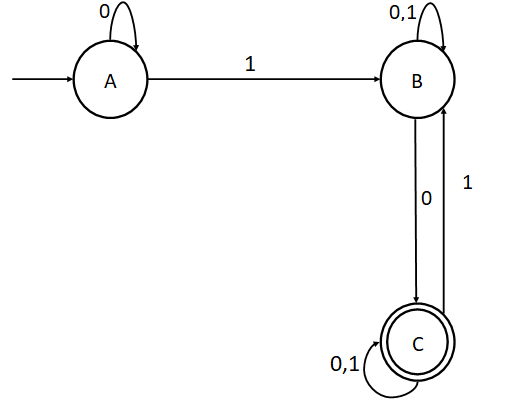

**Solution**


**1.   Construct a transition table for the above NFA**
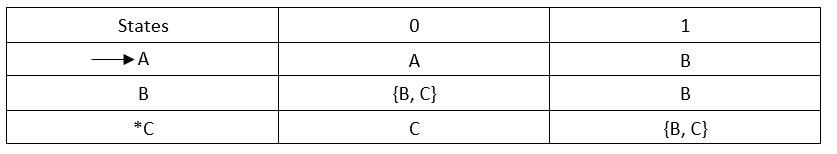

**2.   Construct a resultant DFA transition table**

transition for state A:
(A, 0) = A  
(A, 1) = B 

transition for state B:
(A, 0) = {B, C}
(B, 1) = B

transition for state C:
(C, 0) = C 
(C, 1) = {B, C}

transition for state {B, C}:
({B, C}, 0) = (B, 0) ∪ (C, 0)  
                      = {B, C} ∪ {C}  
                      = {B, C}  
({B, C}, 1) = (B, 1) ∪ (C, 1)  
                      = {B} ∪ {B, C}  
                      = {B, C}   

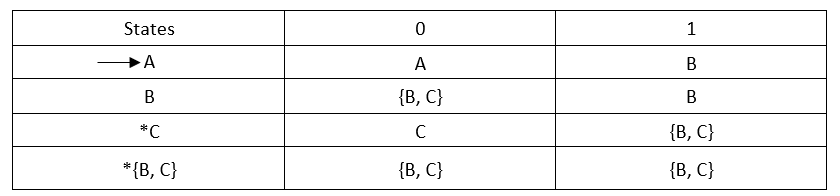

**3.   Draw the transitional diagram for the DFA**

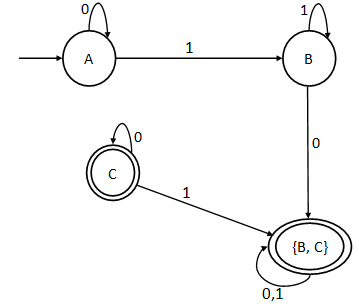



# **Lab2.2: How to use Flex and Bison when building a simple lexical analyzer.**

# **a) Flex**

Flex code has 3 sections:

1.   Definition Section
2.   Rule Section
3.   Code Section

- The definition section defines the variables that are accessed in yylex() and main().
- The Rule Section contains the rules.
- Code Section, can have code for printing the output.






In [ ]:
/*** Definition Section ***/
%{
int count = 0;
%}
 
/*** Rule Section ***/
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}
.     {printf("%s not a capital letter\n", yytext);}
\n    {return 0;}
%%
 
/*** Code Section ***/
int yywrap(){}
int main(){
 
// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
          which contains the input*/
/* yylex() - this is the main flex function
          which runs the Rule Section*/
// yytext is the text in the buffer
 

 
yylex();
printf("\nNumber of Captial letters "
      "in the given input - %d\n", count);
 
return 0;
}

To run the code above:

1. Save the code in a file with a .l extension.
2. Open Command Prompt and go to the directory where the file is stored.
3. Run the commands below.

In [ ]:
flex File.l

gcc lex.yy.c

a.exe


After the above commands are run, the user can provide the input. 

- The compiler transforms the file.l to a C program
- The gcc compiler then lex.yy.c to an executable file.
- The a.out takes and converts the input to tokens.

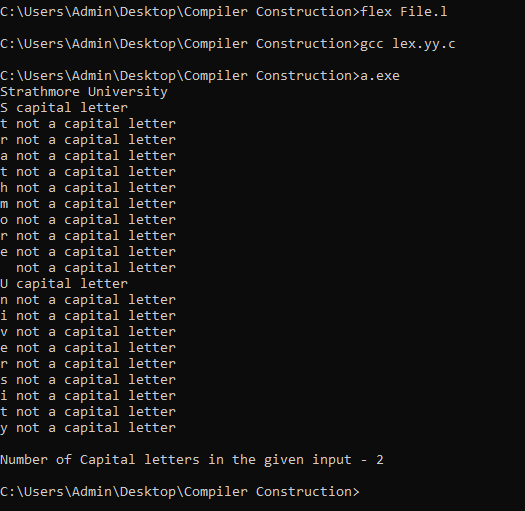

# **b) Bison**

How to use Bison:
1. Write a lexical analyzer to process input and pass tokens to the parser.

In [ ]:
%{
    /*definitions*/
    include "parser.tab.h"
%}

%%
[0-9]+ {yylval.num = atoi(yytext);return NUMBER;}
\n {return EOL;}
. {}

%%
yywrap(){}


2.   Write the grammar specification for bison including grammar rules, yyparse() and yyerror().

In [ ]:
%{
    /*definitions*/
%}

%union{
    int num;
    char sym;
}
%token EOL
%token<num> NUMBER
%type<num> exp
%token PLUS
/* rules */
%%
input: 
exp EOL {printf("%d\n",$1);}
| EOL; //Input could be an expression followed by an end of line or just an end of line.

exp: NUMBER {$$ = $1;}
 | exp PLUS exp {$$ = $1 + $3;}
 ;
%%

int main()
{
    yyparse();

    return 0;
}
yyerror(char* s)
{
    printf("ERROR: %s\n",s);
    return 0;
}

3.   Run Bison on the grammar to produce the parser

![](https://github.com/ShemMwanza/Compiler-Construction-2022/blob/main/diagram/running%20bison%20part.png?raw=1)

4.   Compile the code output by Bison, as well as any other source files.

![](https://github.com/ShemMwanza/Compiler-Construction-2022/blob/main/diagram/running%20gcc%20command.png?raw=1)

5.   Run the created executable file

![](https://github.com/ShemMwanza/Compiler-Construction-2022/blob/main/diagram/running%20a.exe.png?raw=1)

# **Lab 3: Develop a simple lexer by developing your own Flex input file**

**A simple calculator**

*   Below is the code that implements a simple calculator:

In [ ]:
/*lex program to implement
		- a simple calculator.*/

%{
int op = 0,i;
float a, b;
%}

dig [0-9]+|([0-9]*)"."([0-9]+)
add "+"
sub "-"
mul "*"
div "/"
pow "^"
ln \n
%%

{dig} {digi();}
{add} {op=1;}
{sub} {op=2;}
{mul} {op=3;}
{div} {op=4;}
{pow} {op=5;}
{ln} {printf("\n The Answer :%f\n\n",a);}

%%
digi()
{
if(op==0)

/* atof() is used to convert
	- the ASCII input to float */
a=atof(yytext);

else
{
b=atof(yytext);

switch(op)
{
case 1:a=a+b;
	break;

case 2:a=a-b;
break;

case 3:a=a*b;
break;

case 4:a=a/b;
break;

case 5:for(i=a;b>1;b--)
a=a*i;
break;
}
op=0;
}
}

main(int argv,char *argc[])
{
yylex();
}

yywrap()
{
return 1;
}

*   The ouput of the above code:

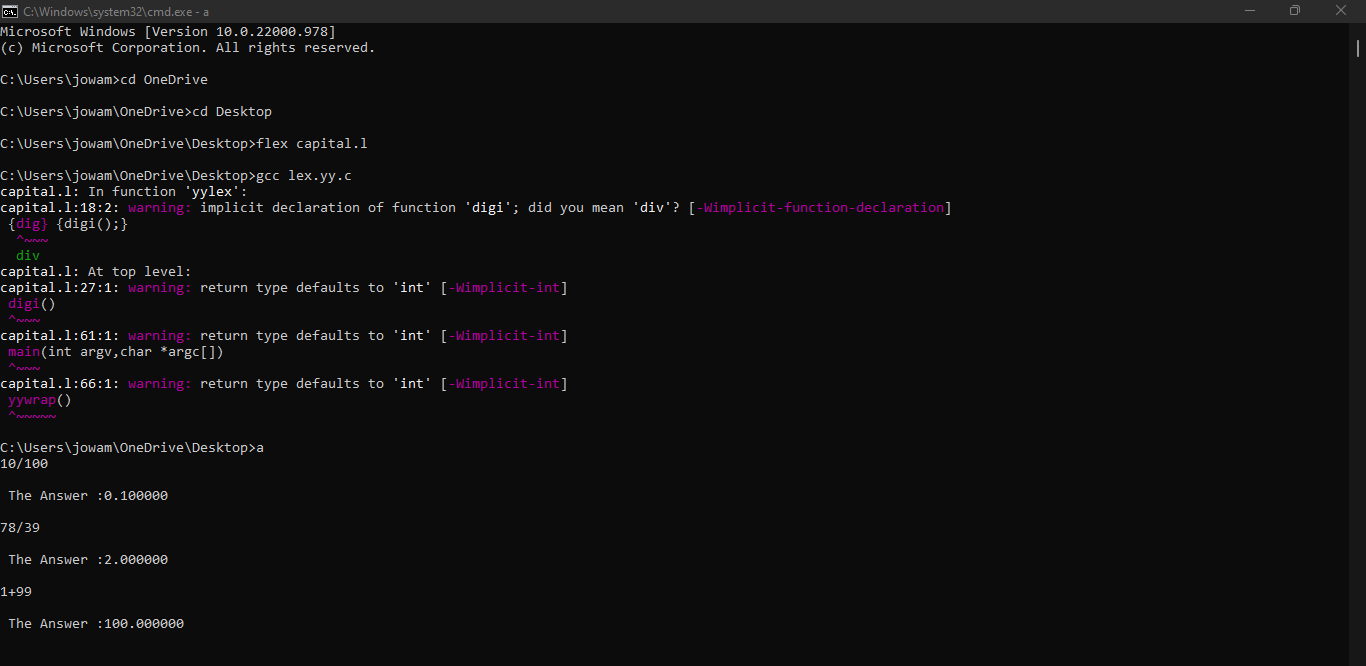

# **Lab 4: Predictive Parsing**

**1) Definition of Predictive Parsing**
*   Predictive parsing is a special form of recursive descent parsing, where no backtracking is required, so this can predict which products to use to replace the input string. 
*   A Predictive Parser has the following components:
1.   Input Buffer − The input buffer includes the string to be parsed followed by an end marker $\$$ to denote the end of the string.
2.   Stack − It contains a combination of grammar symbols with $\$$ on the bottom of the stack. At the start of Parsing, the stack contains the start symbol of Grammar followed by $\$$.
3.   Parsing Table − It is a two-dimensional array or Matrix M [A, a] where A is nonterminal and 'a' is a terminal symbol.

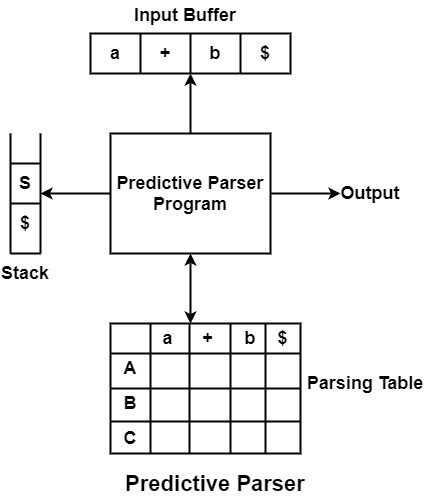








**2a) LL(1) Parsing**
* A LL(1) is a non-recursive top-down parser that uses a one-token lookahead where:
  * The first L indicates that the input is read from left to right.
  * The second L says that it produces a left-to-right derivation.
  * The 1 says that it uses one lookahead token.
* With the help of first() and follow() sets, this parsing can be done using just a stack that avoids the recursive calls.
* Algorithm for LL(1) parsing is:
    
      Input: 
        string ω 
        parsing table M for grammar G

      Output:
        If ω is in L(G) then left-most derivation of ω, 
        error otherwise.

      Initial State : $S on stack (with S being start symbol)
        ω$ in the input buffer

      SET ip to point the first symbol of ω$.

      repeat
        let X be the top stack symbol and a the symbol pointed by ip.

        if X∈ Vt or $
          if X = a
            POP X and advance ip.
          else
            error()
          endif
      
        else	/* X is non-terminal */
          if M[X,a] = X → Y1, Y2,... Yk    
            POP X
            PUSH Yk, Yk-1,... Y1 /* Y1 on top */
            Output the production X → Y1, Y2,... Yk 
          else
            error()
          endif
        endif
      until X = $	/* empty stack */

**2b) First() and Follow()**
* *First(α)* is a set of terminal symbols that begin in strings derived from α.
* For example: 
      A → abc / def / ghi
      First(A)-> {a, d, g}
  **Rules for Calculating First()**
1. For a production rule X → ∈, 
    First(X) = { ∈ }
2. For any terminal symbol ‘a’,
    First(a) = { a }

* Follow(α) is a set of terminal symbols that appear immediately to the right of α.
* For example using the above example:
      Follow(A)-> {$}
  **Rules for Calculating Folllow()**
1. For the start symbol S, place $ in Follow(S).
2. For any production rule A → αB,
    Follow(B) = Follow(A)
3. For any production rule A → αBβ,
  * If ∈ ∉ First(β), then Follow(B) = First(β)
  * If ∈ ∈ First(β), then Follow(B) = { First(β) – ∈ } ∪ Follow(A)


**3) Unique Attributes in Top-Down Parsing**
* Top-Down Parsing internally uses left most derivation.
* Top-Down Parsing is constructed for a grammar if it is free from ambiguity and left recursion.
* The time complexity for Top-Down Parsing is O(n²)

# **Lab 5: Syntax Analysis**

## **Question 1: Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails.**

This is the second phase of the compiler after lexical analysis. It is also called parsing.
In this phase the syntactical structure of the given input is checked so as to determine whether the given input is in the correct syntax (of the language in which the input has been written) or not. 
Moreover, it is in this phase that the intermediate representation (IR) for the source program is built.

**How the above operation is implemented**

The parser uses the first components of the tokens produced by the lexical analyzer to create
a tree-like intermediate representation that depicts the grammatical structure
of the token stream. A typical representation is a syntax tree in which each interior node represents an operation and the children of the node represent the arguments of the operation. If the given input string can be produced with the help of the syntax tree (in the derivation process), the input string is found to be in the correct syntax. if not, the error is reported by the syntax analyzer or the parser.


## **Question 2: Using Flex and Bison to develop a simple syntax analyzer**

Flex is a tool that can be used to write lexical analyzers. The Lexical analyzer can then scan the input stream and converts sequences of
characters into tokens.

Yacc can be used for programming parsers. The parser then reads tokens and compares the input using the grammar rules of the language.



# Flex Code

In [ ]:
%{
	#include <math.h>
	#include "calculator.tab.h"
	void yyerror(char* s);
%}

letter	[a-zA-Z]
digit	[0-9]
integer	[+-]?{digit}+
exponent [eE][+-]?{digit}+
double [+-]?{digit}*"."{digit}+{exponent}?
whitespace [ \t\n]
litterals [=;]

%%
"print"	{ return PRINT_COMMAND; }
"exit"	{ return EXIT_COMMAND; }
{letter}	{ yylval.id = yytext[0]; return IDENTIFIER; }
{integer}|{double}	{ yylval.num = atof(yytext); return NUMBER; }
"PI"	{ yylval.num = M_PI; return NUMBER; }
{whitespace}	;
{litterals}	{ return yytext[0]; }
"+" { return PLUS; }
"-" { return MINUS; }
"*" { return MULTIPLY; }
"/" { return DIVIDE; }
"^" { return POWER; }
"(" { return OPEN_BRACKET; }
")" { return CLOSE_BRACKET; }
.	{ yyerror("An Unexpected character: "); ECHO; }
%%

int yywrap(void) {
	return 1;
}

The Flex code above is responsible for producing tokens that will be received as input in yacc program
 

# Bison Code

In [ ]:
%{
	#include <stdio.h>
	#include <stdlib.h>
	#include <ctype.h>
	#include <math.h>
	void yyerror(char* s);
	int yylex();
	int symbols[52];
	double symbolValue(char symbol);
	void updateSymbolValue(char symbol, double value);
%}

%union { double num; char id; }
%start line
%token PRINT_COMMAND EXIT_COMMAND PLUS MINUS MULTIPLY DIVIDE POWER OPEN_BRACKET CLOSE_BRACKET SIN COS TAN EXP LOG SQRT
%token <num> NUMBER
%token <id> IDENTIFIER
%type <num> line exp term
%type <id> assignment

%left PLUS MINUS
%left MULTIPLY DIVIDE
%left POWER

%%

line: assignment ';' {;}
	| EXIT_COMMAND ';' { exit(EXIT_SUCCESS); }
	| PRINT_COMMAND exp ';' { printf("Printing: %.5f\n", $2); }
	| line assignment ';' {;}
	| line PRINT_COMMAND exp ';' { printf("Printing: %.5f\n", $3); }
	| line EXIT_COMMAND ';' { exit(EXIT_SUCCESS); };

assignment: IDENTIFIER '=' exp { updateSymbolValue($1, $3); };

exp: term { $$ = $1; }
	| exp PLUS exp { $$ = $1 + $3; }
	| exp MINUS exp { $$ = $1 - $3; }
	| exp MULTIPLY exp { $$ = $1 * $3; }
	| exp DIVIDE exp { if($3 == 0) { printf("Error occurred: Division by zero. \n"); exit(EXIT_FAILURE); } else $$ =  $1 / $3; }
	| exp POWER exp { $$ = pow($1, $3); }
term: NUMBER { $$ = $1; }
	| IDENTIFIER { $$ = symbolValue($1); };
	
%%

int symbolIndex(char symbol){
	int index = -1;
	if(islower(symbol)){
		index = symbol - 'a' + 26;
	}
	else if(isupper(symbol)){
		index = symbol - 'A';
	}
	
	return index;
}

double symbolValue(char symbol) {
	return symbols[symbolIndex(symbol)];
}

void updateSymbolValue(char symbol, double value) {
	symbols[symbolIndex(symbol)] = value;
}

int main(void) {	
	return yyparse();
}

void yyerror(char* s) {
	fprintf(stderr, "Error occurred: %s\n", s);
}


# Code Output

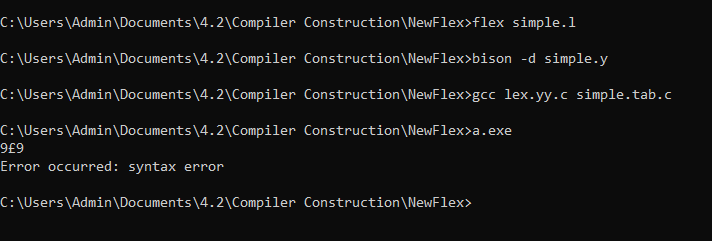

From the above each token token is defined first before the grammar rules.

The syntax analyser checks whether the program satisfies the rules of the grammar. If the program does not satisfy the rules, it returns "syntax error"

Other than having rules, the code also has the terminals, *,+, the non-terminals such as, line.

# **Lab 6: Three Address Code (TAC)**

**1.**   **IF Statement**




In [ ]:
if (A<B && C<D)
then t=1
else t=0

The Three Address Code for this expression is:

*  (1) if (A<B) goto (3)
*  (2) goto (4)
*  (3) if (C<D) goto (6)
*  (4) t=0
*  (5) goto (7)
*  (6) t=1
*  (7)

**2.**   **FOR Loop**


In [ ]:
for(j=1;j<=300;j++)
{
    b[j] = y*7;
}

The Three Address Code for this expression is:
*  i =1
*  L: 
**   $t_1$ = y * 7
**   $t_2$ = &b
**   $t_3$ = sizeof(int)
**   $t_4$ = $t_3$ * j
**   $t_5$ = $t_2$ + $t_4$
**  *$t_5$ = $t_1$
*   j=j+1
*   if j<=300 goto L







**3.**   **WHILE Loop**

In [ ]:
int a;
int b;

while (a<b)
{
    a=a*2;
}
b=a;

* _L$_0$:
** _t$_0$ = a < b;
** IfZ _t$_0$ Goto _L$_1$;
** a = a * 2;
** Goto _L$_0$;
* _L$_1$:
** b = a;

# **References**



1.   Levine, J. (2009). Flex & Bison: Text Processing Tools. \" O'Reilly Media, Inc.\",
2.   LEX - javatpoint. (2022). Www.Javatpoint.Com. https://www.javatpoint.com/lex\n,
1.   Lex code for password validation. (2019, June 25). GeeksforGeeks. https://www.geeksforgeeks.org/lex-code-for-password-validation/,
2.   Geeks for Geeks. (2022). Flex (Fast Lexical Analyzer Generator ). Retrieved from Geeks for Geeks: https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/
1.   Bison—GNU Project—Free Software Foundation. (n.d.). Retrieved September 5, 2022, from https://www.gnu.org/software/bison/,
2.   GNU Bison—The Yacc-compatible Parser Generator—GNU Project—Free Software Foundation. (n.d.). Retrieved September 5, 2022, from https://www.gnu.org/software/bison/manual/,
1.   Bison Tutorial. (n.d.). Retrieved September 5, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html"
2.   Compiler Design - Top-Down Parser. (2022). Www.tutorialspoint.com. https://www.tutorialspoint.com/compiler_design/compiler_design_top_down_parser.htm
1.   First and Follow | Solved Examples | Gate Vidyalay. (2022). Www.gatevidyalay.com. Retrieved October 15, 2022, from https://gatevidyalay.com/first-and-follow-compiler-design/
2. What is a Predictive Parser? (2022). Www.tutorialspoint.com. Retrieved October 15, 2022, from https://www.tutorialspoint.com/what-is-a-predictive-parser#
1. Why FIRST and FOLLOW in Compiler Design? (2015, September 23). GeeksforGeeks. https://www.geeksforgeeks.org/why-first-and-follow-in-compiler-design/
12. Education 4u (Director). (2019, January 9). Top Down parser | Types of Parser | Compiler Design | Lec—10 | Bhanu priya. https://www.youtube.com/watch?v=a4qdbCQJhyA
13. Introduction to Syntax Analysis in Compiler Design (2022). www.geeksforgeeks.org. Retrieved October 24, 2022, from https://www.geeksforgeeks.org/introduction-to-syntax-analysis-in-compiler-design/
14. HtewechIheb/Scientific-Calculator-Syntax-Parser
Public https://github.com/HtewechIheb/Scientific-Calculator-Syntax-Parser



‌
‌
